In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# custom parser because we can't read the last column into one cell (34359453)
# returns data frame with every change record
def parse(fname, NROWS=10000, NSKIP=1):
    NAMES=['index', 'type', 'time', 'date', 'flag', 'msg']
    records = []
    with open(fname, 'r') as f:
        i = 0
        for line in f:
            i += 1
            if i < NSKIP + 1: continue
            if i > NROWS + 1: break
        
            r = []; msg = ""
            for word in line.split(' '):
                if len(r) < len(NAMES) - 1 :
                    r.append(word)        # structured change log line
                else:
                    if word != '\n':
                        msg += word + ' ' # message isn't delimited
            r.append(msg)
            records.append(r)
    print "done w/ "  + fname
    return pd.DataFrame(records, columns=NAMES)
#df = parse("/root/l1-mar29-changelog-anon.log", NROWS=1000000)
df0 = parse("/root/day0", NROWS=36884)
df1 = parse("/root/day1", NROWS=1000000) #13249412)
df2 = parse("/root/day2", NROWS=1000000) #21073163)

done w/ /root/day0
done w/ /root/day1
done w/ /root/day2


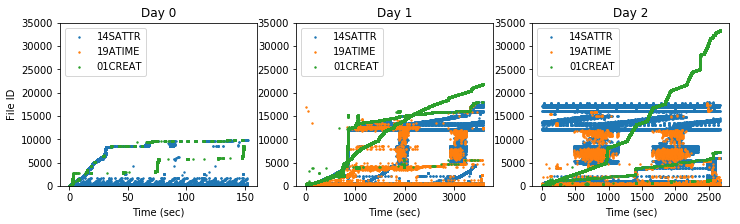

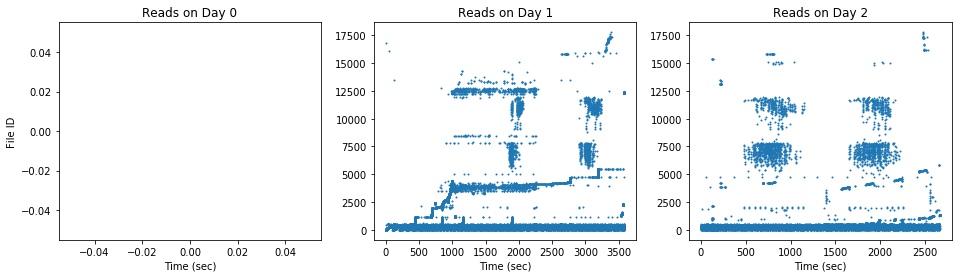

In [39]:
keyids = {}
def assign_unique_keys(keys):
    accesses = []; nkeys = 0
    for key in keys:
        try:
            keyid = keyids[key]
        except:
            keyids[key] = nkeys
            keyid = nkeys
            nkeys += 1
        accesses.append(keyid)
    return accesses

def to_seconds(ts):
    hours, minutes, seconds = ts.split(':')
    return float(seconds) + 60*float(minutes) + 60*60*float(hours)  

def get_ops(df, op):
    ops = df[df['type'] == op]
    time = ops['time'].apply(lambda x: to_seconds(x)).as_matrix()
    keys = ops['msg'].apply(lambda x: x.split(' ')[0].split('=')[1][:-1][1:])
    if len(time) == 0:
        return [], []
    return time - time[0], assign_unique_keys(keys)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
dfs = [df0, df1, df2]
for i in range(0, len(dfs)):
    for op in ['14SATTR', '19ATIME', '01CREAT']:
        time, keys = get_ops(dfs[i], op)
        ax[i].scatter(time, keys, s=2, label=op)
    ax[i].set_xlabel("Time (sec)")
    ax[i].set_ylim(0, 35000)    
    ax[i].set_title("Day " + str(i))
    ax[i].legend(loc='upper left')
ax[0].set_ylabel("File ID")

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
dfs = [df0, df1, df2]
for i in range(0, len(dfs)):
    for op in ['19ATIME']:
        time, keys = get_ops(dfs[i], op)
        ax[i].scatter(time, keys, s=1, label=op)
    ax[i].set_xlabel("Time (sec)")
    ax[i].set_title("Reads on Day " + str(i))
ax[0].set_ylabel("File ID")

In [36]:
ops = df[df['type'] == '01CREAT']
for key, val in ops.iterrows():
    

166    0x20a3a1f98:0x1654e:0x0
262    0x20a3a2ffd:0x15fa7:0x0
350     0x20a3a325f:0x7402:0x0
382     0x20a3a2012:0xf8c3:0x0
398    0x20a3a1ff0:0x1fc3e:0x0
Name: msg, dtype: object
166    0x20a3a257a:0x175ca:0x0
262    0x20a3a257a:0x17736:0x0
350    0x20a3a257a:0x1778c:0x0
382    0x20a3a257a:0x17682:0x0
398    0x20a3a257a:0x1776e:0x0
Name: msg, dtype: object
